<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [2]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572947 entries, 0 to 572946
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    572947 non-null  float64
 1   Header_Length    572946 non-null  float64
 2   Protocol Type    572942 non-null  float64
 3   Duration         572942 non-null  float64
 4   Rate             572941 non-null  float64
 5   Srate            572939 non-null  float64
 6   Drate            572938 non-null  float64
 7   fin_flag_number  572937 non-null  float64
 8   syn_flag_number  572936 non-null  float64
 9   rst_flag_number  572934 non-null  float64
 10  psh_flag_number  572934 non-null  float64
 11  ack_flag_number  572933 non-null  float64
 12  ece_flag_number  572933 non-null  float64
 13  cwr_flag_number  572933 non-null  float64
 14  ack_count        572933 non-null  float64
 15  syn_count        572932 non-null  float64
 16  fin_count        572932 non-null  floa

In [4]:
print(data['label'].nunique())

34


In [5]:
print(data['label'].unique())

['DDoS-ICMP_Flood' 'DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DDoS-TCP_Flood'
 'MITM-ArpSpoofing' 'DDoS-RSTFINFlood' 'DoS-UDP_Flood' 'DDoS-SYN_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-PSHACK_Flood'
 'DDoS-SynonymousIP_Flood' 'DDoS-ACK_Fragmentation'
 'DDoS-ICMP_Fragmentation' 'BenignTraffic' 'Mirai-udpplain'
 'Mirai-greip_flood' 'DDoS-UDP_Fragmentation' 'Recon-PortScan'
 'DNS_Spoofing' 'DDoS-HTTP_Flood' 'DictionaryBruteForce' 'Recon-PingSweep'
 'DoS-HTTP_Flood' 'Recon-HostDiscovery' 'CommandInjection' 'Recon-OSScan'
 'Uploading_Attack' 'VulnerabilityScan' 'DDoS-SlowLoris' 'SqlInjection'
 'BrowserHijacking' 'Backdoor_Malware' nan 'XSS']


In [6]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 37


In [7]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572910 entries, 0 to 572945
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    572910 non-null  float64
 1   Header_Length    572910 non-null  float64
 2   Protocol Type    572910 non-null  float64
 3   Duration         572910 non-null  float64
 4   Rate             572910 non-null  float64
 5   Srate            572910 non-null  float64
 6   Drate            572910 non-null  float64
 7   fin_flag_number  572910 non-null  float64
 8   syn_flag_number  572910 non-null  float64
 9   rst_flag_number  572910 non-null  float64
 10  psh_flag_number  572910 non-null  float64
 11  ack_flag_number  572910 non-null  float64
 12  ece_flag_number  572910 non-null  float64
 13  cwr_flag_number  572910 non-null  float64
 14  ack_count        572910 non-null  float64
 15  syn_count        572910 non-null  float64
 16  fin_count        572910 non-null  float64
 

In [9]:
print(data['label'].nunique())

34


In [10]:
print(data['label'].unique())

['DDoS-ICMP_Flood' 'DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DDoS-TCP_Flood'
 'MITM-ArpSpoofing' 'DDoS-RSTFINFlood' 'DoS-UDP_Flood' 'DDoS-SYN_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-PSHACK_Flood'
 'DDoS-SynonymousIP_Flood' 'DDoS-ACK_Fragmentation'
 'DDoS-ICMP_Fragmentation' 'BenignTraffic' 'Mirai-udpplain'
 'Mirai-greip_flood' 'DDoS-UDP_Fragmentation' 'Recon-PortScan'
 'DNS_Spoofing' 'DDoS-HTTP_Flood' 'DictionaryBruteForce' 'Recon-PingSweep'
 'DoS-HTTP_Flood' 'Recon-HostDiscovery' 'CommandInjection' 'Recon-OSScan'
 'Uploading_Attack' 'VulnerabilityScan' 'DDoS-SlowLoris' 'SqlInjection'
 'BrowserHijacking' 'Backdoor_Malware' 'XSS']


In [11]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

In [12]:
# Assuming your DataFrame is named df
binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1, 'DDoS-SynonymousIP': 1, 'DD': 1, 'DDoS-': 1,
                  'DoS-UDP_Flo': 1, 'DDoS': 1 }

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [13]:
print(data['label'].nunique())

2


In [14]:
print(data['label'].unique())

[1 0]


In [15]:
total_benign_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'BenignTaffic' :", total_benign_traffic_rows)


Total rows with label 'BenignTaffic' : 13338


# Data Analysis

# Model Training

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]


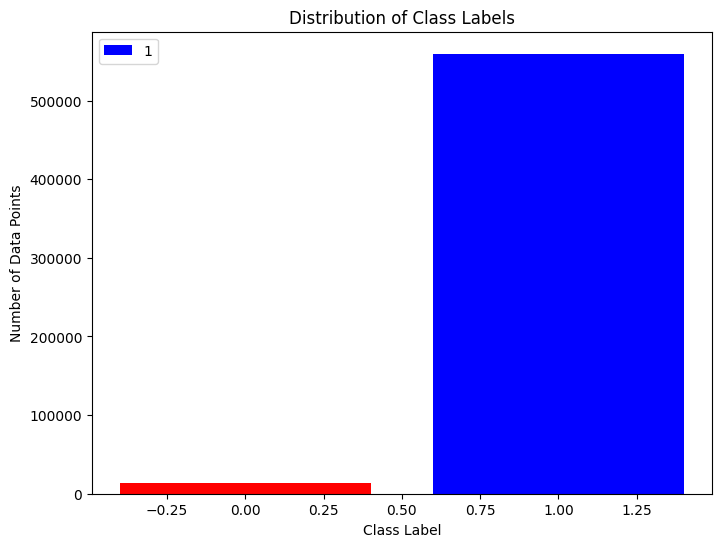

In [17]:

# Count occurrences of each class
class_counts = Y.value_counts()

# Define colors for each class
colors = ['blue', 'red']  # Adjust colors as needed

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel("Class Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Class Labels")

# Add a legend if needed
plt.legend(class_counts.index, loc='upper left')

plt.show()


In [26]:
# Check class imbalance
print(Y.value_counts())

label
1    559572
0     13338
Name: count, dtype: int64


<Axes: ylabel='count'>

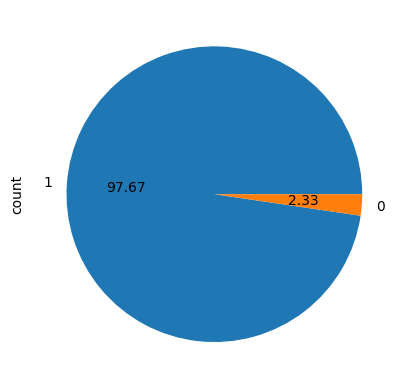

In [19]:
Y.value_counts().plot.pie(autopct="%.2f")

In [27]:
from imblearn.over_sampling import ADASYN
ros = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
X_ros , Y_ros = ros.fit_resample(X,Y)


In [28]:
print(Y_ros.value_counts())

label
1    559572
0    558372
Name: count, dtype: int64


<Axes: ylabel='count'>

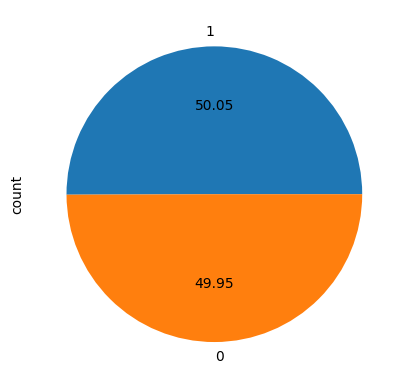

In [29]:
Y_ros.value_counts().plot.pie(autopct="%.2f")

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_ros)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(894355, 46)
(223589, 46)
(894355,)
(223589,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.9851380865922803
Recall: 0.9851380537231522
Precision: 0.9851453971800281
F1 Score: 0.9851380298596017


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    412524
           1       0.98      0.99      0.99    412538

    accuracy                           0.99    825062
   macro avg       0.99      0.99      0.99    825062
weighted avg       0.99      0.99      0.99    825062



# Confusion Matrix

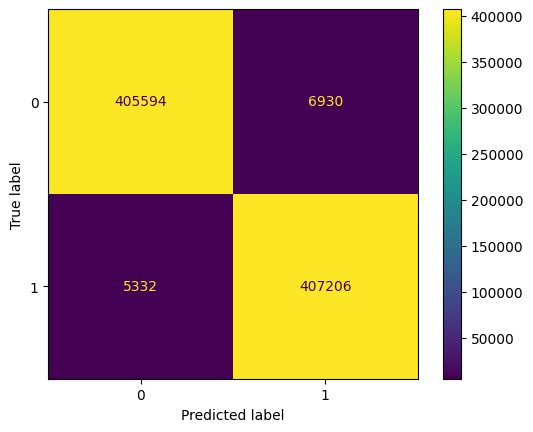

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.show()


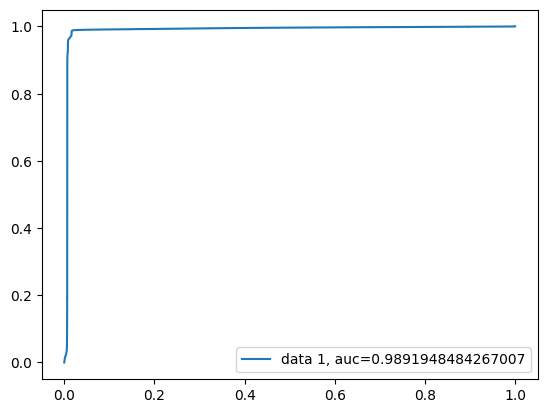

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plotting the ROC curve and calculating AUC score
# 0(worst) to 1(best) -> 0.98 score


# Creating a Mesh Grid from 2 features

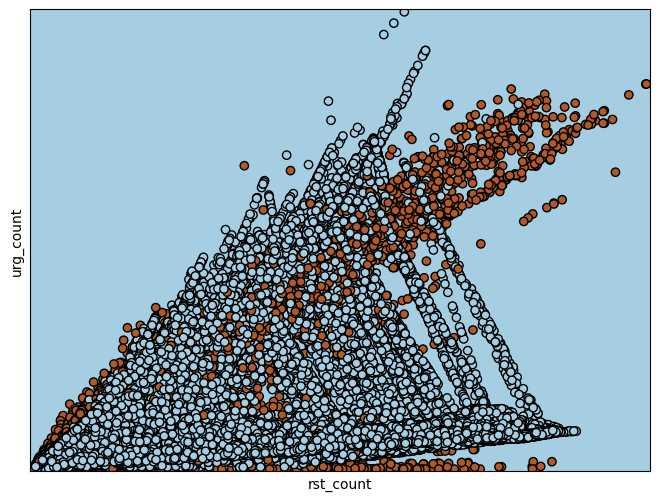

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_ros and Y_ros are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the data
logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train[['rst_count', 'urg_count']], Y_train)

# Create a scatter plot with decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    logistic_regression_model,
    X_train[['rst_count', 'urg_count']],  # Use Telnet on the x-axis and Tot size on the y-axis
    cmap=plt.cm.Paired,
    ax=plt.gca(),
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="rst_count",
    ylabel="urg_count",
    eps=0.5,
)

# Plot training points
plt.scatter(X_train['rst_count'], X_train['urg_count'], c=Y_train, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()


# Feature Importance Graph from Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
Y_pred_rf = rf_model.predict(X_test)




In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf, average='macro'))

Accuracy: 0.9983346706065725
Recall: 0.9983346954089766
Precision: 0.9983389049541831
F1 Score: 0.9983346671305677


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    412524
           1       1.00      1.00      1.00    412538

    accuracy                           1.00    825062
   macro avg       1.00      1.00      1.00    825062
weighted avg       1.00      1.00      1.00    825062



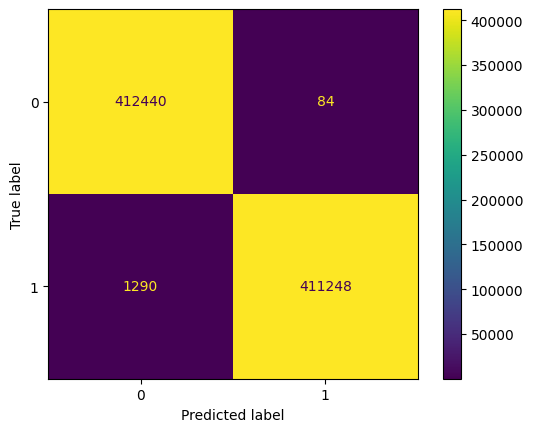

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(Y_test, Y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()


# Mesh Daigram for 2 features of Random Forest

In [ ]:
X_train_new = X_train[["urg_count", "rst_count"]]
X_test_new=X_test[["urg_count", "rst_count"]]

In [ ]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3300245 entries, 4108117 to 2219110
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   urg_count  float64
 1   rst_count  float64
dtypes: float64(2)
memory usage: 75.5 MB


In [ ]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3300245 entries, 4108117 to 2219110
Series name: label
Non-Null Count    Dtype
--------------    -----
3300245 non-null  int64
dtypes: int64(1)
memory usage: 50.4 MB


In [ ]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model_new = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model_new.fit(X_train_new, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
Y_pred_rf_new = rf_model_new.predict(X_test_new)




In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf_new))
print("Recall:", recall_score(Y_test, Y_pred_rf_new, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf_new, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf_new, average='macro'))

Accuracy: 0.9899413619824934
Recall: 0.9899414680396886
Precision: 0.9900178362063848
F1 Score: 0.9899409711272587


In [ ]:
print(X_train_new["urg_count"].max())
print(X_train_new["urg_count"].min())
print(X_train_new["rst_count"].max())
print(X_train_new["rst_count"].min())

3789.1
0.0
9606.5
0.0


In [ ]:
# define bounds of the domain
min_urg, max_urg = X_train_new["urg_count"].min() - 1, X_train_new["urg_count"].max() + 1
min_rst, max_rst = X_train_new["rst_count"].min() - 1, X_train_new["rst_count"].max() + 1

print(f"Minimum 'urg_count': {min_urg}, Maximum 'urg_count': {max_urg}")
print(f"Minimum 'rst_count': {min_rst}, Maximum 'rst_count': {max_rst}")

Minimum 'urg_count': -1.0, Maximum 'urg_count': 3790.1
Minimum 'rst_count': -1.0, Maximum 'rst_count': 9607.5


In [ ]:
import numpy as np

# Assuming min_rst, max_rst, min_urg, max_urg are previously defined
x1grid = np.arange(min_urg, max_urg, 0.5)
x2grid = np.arange(min_rst, max_rst, 0.5)


In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [ ]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [ ]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1, r2))

In [ ]:
# make predictions for the grid
Y_pred_rf_new = rf_model_new.predict(grid)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



The warning you're seeing is related to the feature names of your dataset not being available, but the RandomForestClassifier was fitted with feature names during training. This warning is not an error and should not affect the predictions.

If you want to get rid of this warning, you can try providing the feature names when fitting the RandomForestClassifier. During training, you can set the feature_names parameter to the column names of your training data:

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])
This way, the feature names will be associated with the model, and you might not see the warning during predictions. Keep in mind that this is more of a warning for informative purposes and doesn't impact the functionality of your code.

# Popular Features

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the most important features
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


Top 10 Important Features (Random Forest):
          Feature  Importance
17      urg_count    0.208597
18      rst_count    0.133433
39            IAT    0.131296
40         Number    0.099413
45         Weight    0.069143
41       Magnitue    0.050103
44       Variance    0.047747
0   flow_duration    0.036366
36            AVG    0.036049
38       Tot size    0.031420


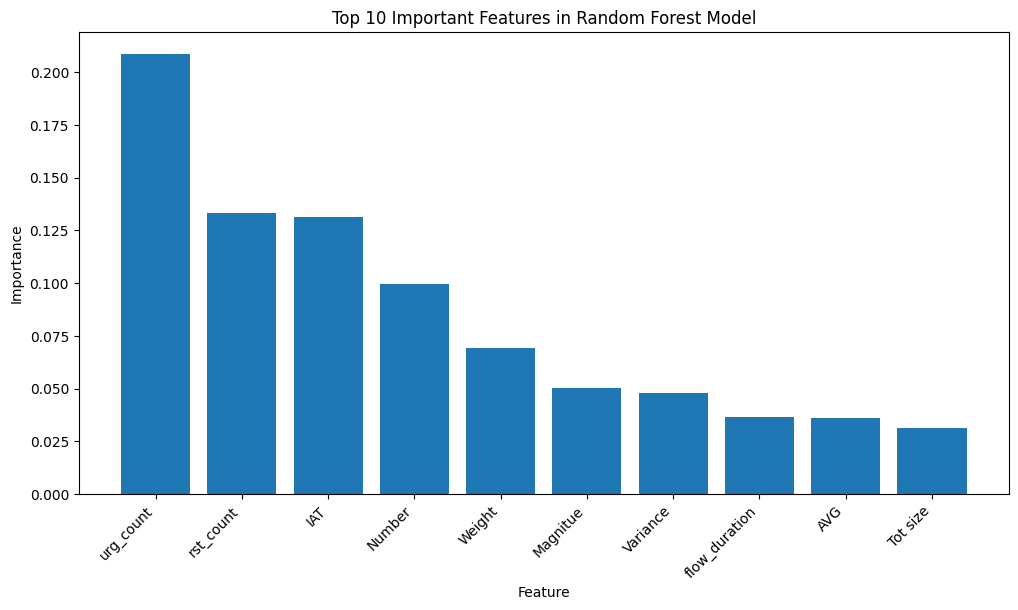

In [ ]:

# Print the top features
print("Top 10 Important Features (Random Forest):")
print(feature_importance_df_rf.head(10))

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df_rf['Feature'][:10], feature_importance_df_rf['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Isolation Forest**

In [ ]:
data.hist(figsize=(12,12))


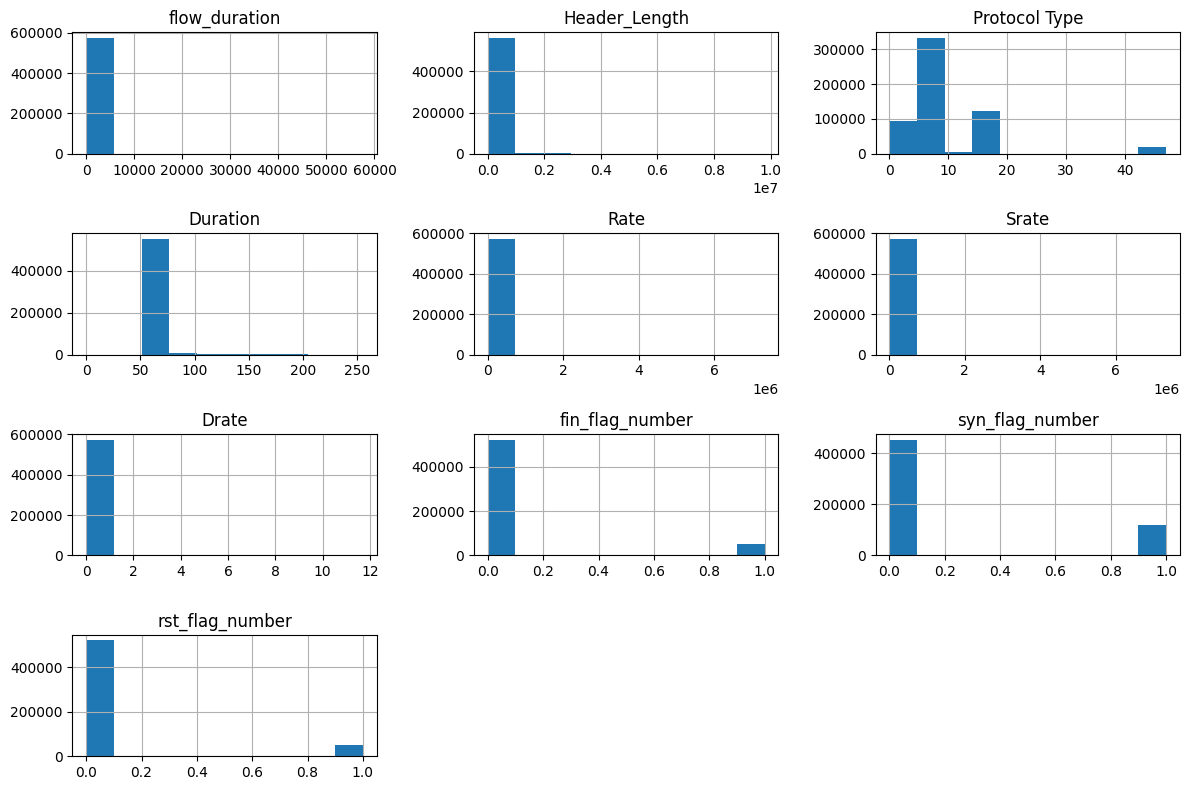

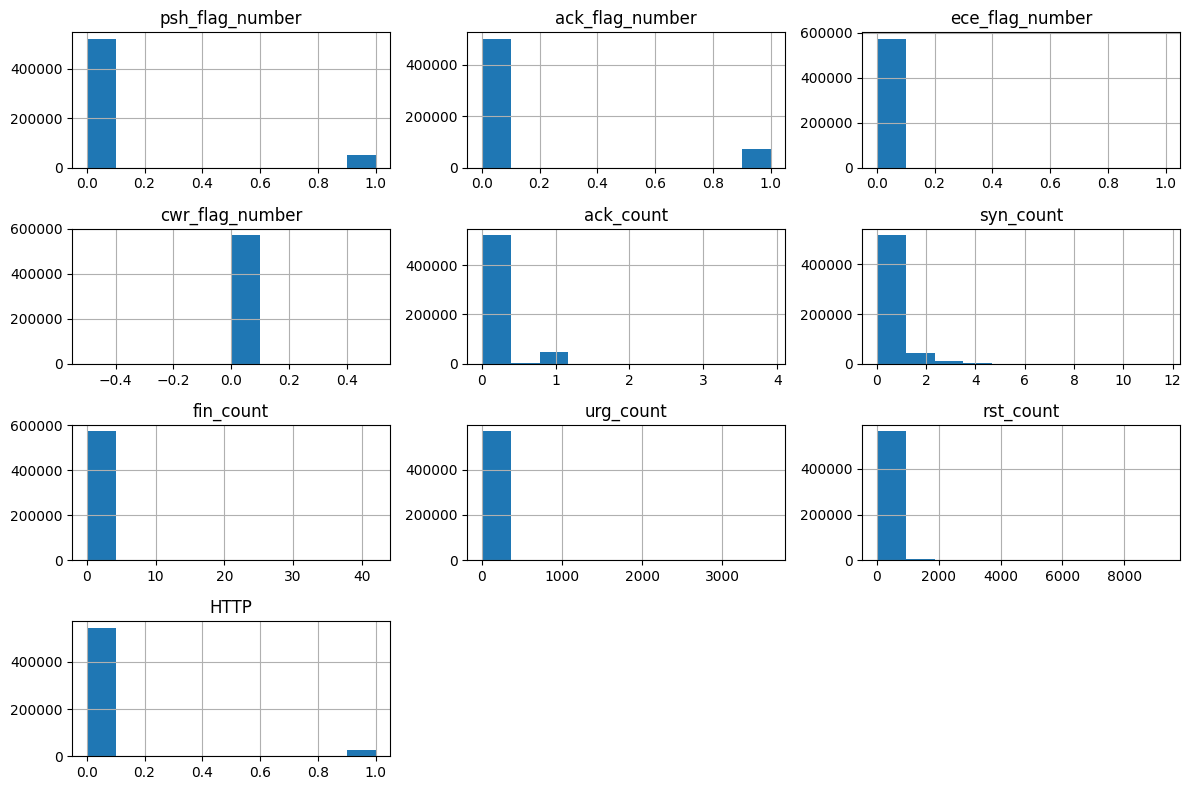

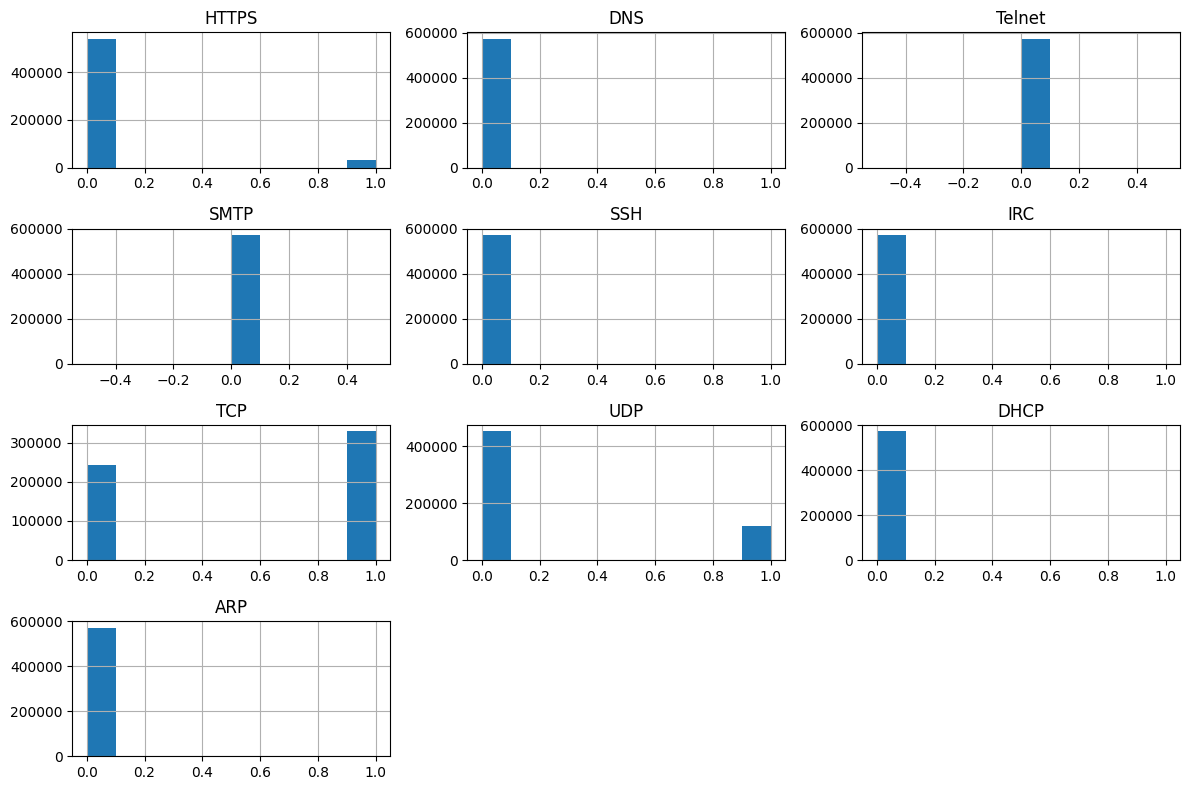

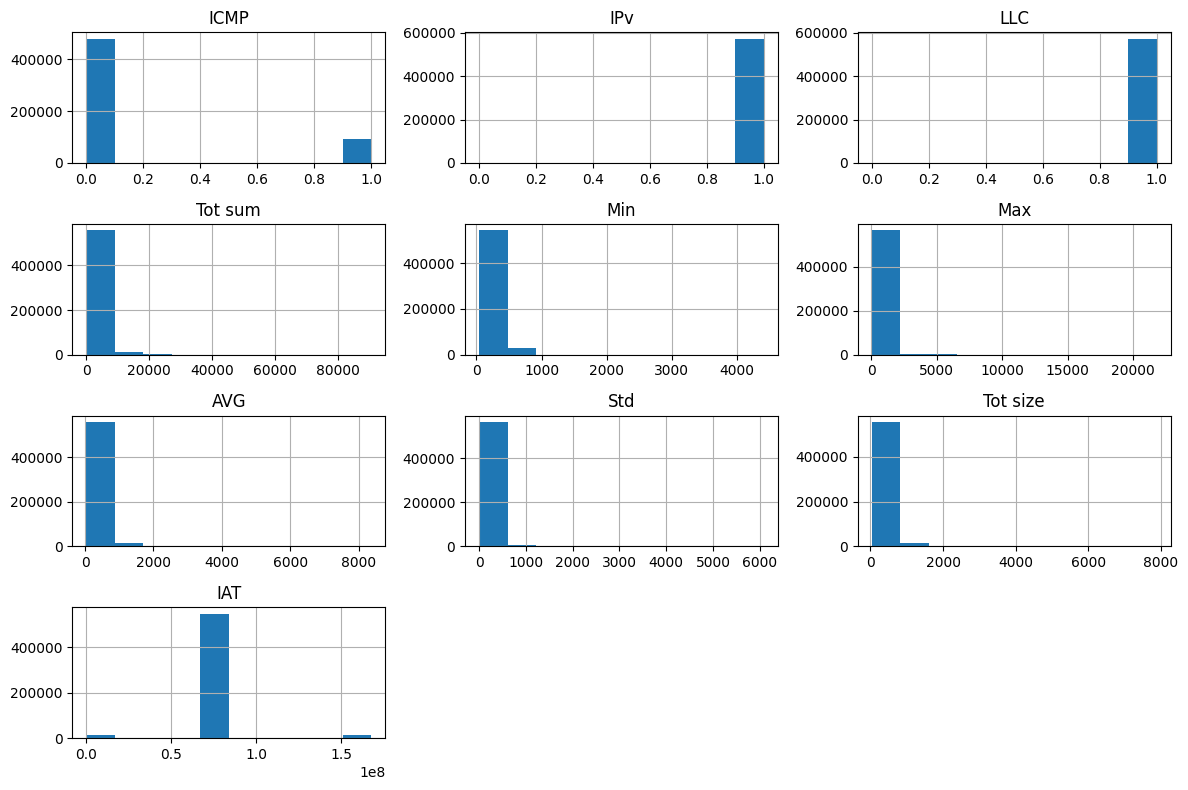

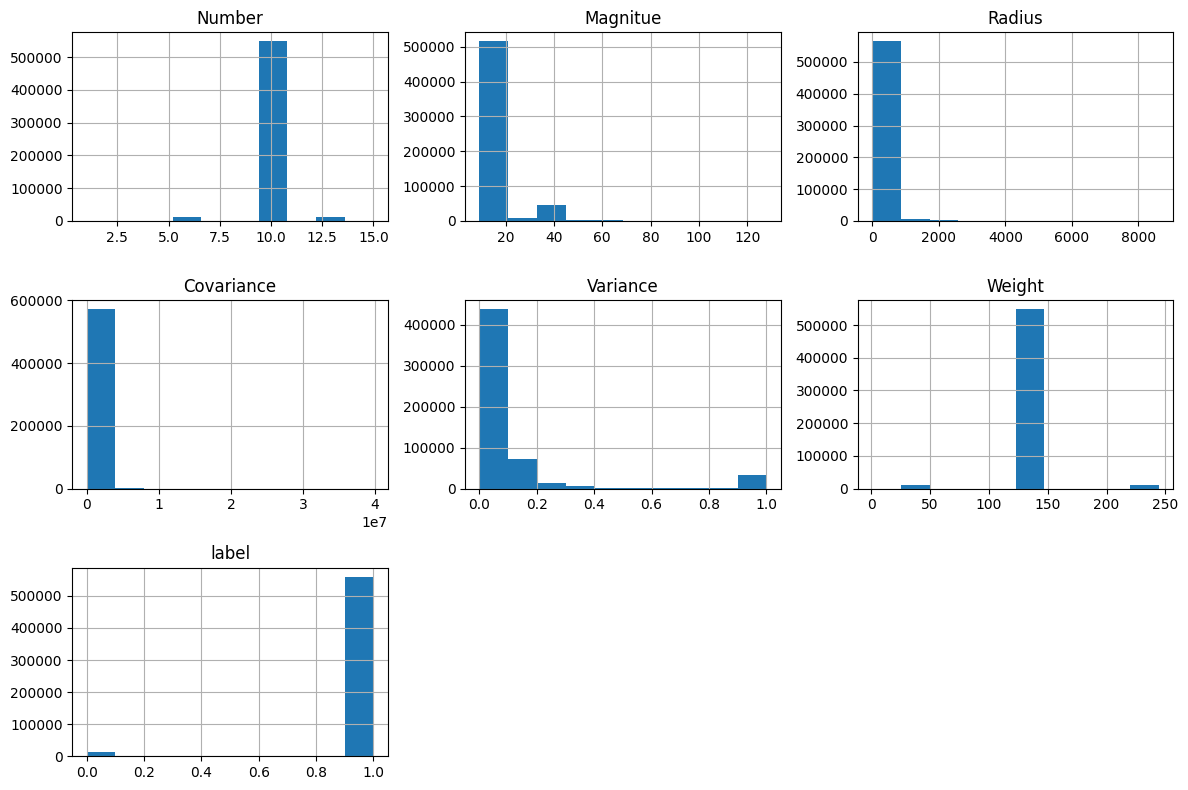

In [38]:
import matplotlib.pyplot as plt

# Define the number of features to plot in each subset
features_per_subset = 10

# Calculate the number of subsets required
num_features = len(data.columns)
num_subsets = (num_features + features_per_subset - 1) // features_per_subset

# Plot histograms for each subset of features
for i in range(num_subsets):
    start_idx = i * features_per_subset
    end_idx = min((i + 1) * features_per_subset, num_features)

    subset_features = data.columns[start_idx:end_idx]
    data[subset_features].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(458328, 46)
(114582, 46)
(458328,)
(114582,)


In [39]:
# Subset the dataset to include only the top 10 important features
top_features = ['urg_count', 'rst_count', 'IAT', 'Number', 'Weight',
                'Magnitue', 'Variance', 'flow_duration', 'AVG', 'Tot size']
X_subset = data[top_features]

# Split the subset dataset into training and testing sets
X_train_subset, X_test_subset, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.2, random_state=42)

print(X_train_subset.shape)
print(X_test_subset.shape)
print(Y_train.shape)
print(Y_test.shape)


(458328, 10)
(114582, 10)
(458328,)
(114582,)


In [45]:
from sklearn.ensemble import IsolationForest

# Create an instance of the Isolation Forest model
isolation_forest = IsolationForest(max_samples=100, random_state=0)

# Train the Isolation Forest model on the training data
isolation_forest.fit(X_train)

# Predict anomalies on the testing data
y_pred_test = isolation_forest.predict(X_test)

# Convert predictions to 0s and 1s (1 for anomalies, -1 for normal instances)
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_test))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test))


Confusion Matrix:
[[    1  2665]
 [99792 12124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2666
           1       0.82      0.11      0.19    111916

    accuracy                           0.11    114582
   macro avg       0.41      0.05      0.10    114582
weighted avg       0.80      0.11      0.19    114582



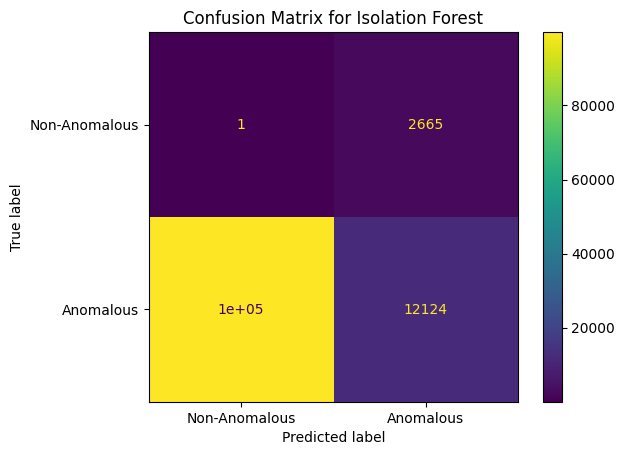

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_if = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

# Plot confusion matrix
disp_if = ConfusionMatrixDisplay(confusion_matrix=cm_if, display_labels=["Non-Anomalous", "Anomalous"])
disp_if.plot()
plt.title("Confusion Matrix for Isolation Forest")
plt.show()
